# Imports

In [41]:
import pandas as pd
import sys
import joblib
sys.path.append('../')
from Utils.location_utils import LocationUtils
sys.path.remove('../')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv('../../Data/magicbricks_lr_encoded.csv').drop(['Price Breakup'], axis=1)
df.head()

,Bedrooms,Car parking,Furnishing,Bathrooms,Floor,Status,Location_Score,Total Floors
0,3,1,1,2,1,0,9.0,1
1,2,0,1,2,2,0,9.0,2
2,2,1,1,2,1,0,9.0,4
3,3,0,1,3,1,0,9.0,4
4,2,1,1,2,1,0,4.0,4


# Graphs

## Distributions

In [35]:
model = joblib.load('../Modelling/Models/rf.pkl')
model

RandomForestRegressor(criterion='mse', n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [36]:
df.shape

(1179, 8)

In [46]:
random_sample = df.iloc[0,:].to_numpy().reshape(1,-1)
random_sample

array([[3., 1., 1., 2., 1., 0., 9., 1.]])

In [38]:
df.describe()

,Bedrooms,Car parking,Furnishing,Bathrooms,Floor,Status,Location_Score,Total Floors
count,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,2.649703,1.109415,1.162002,2.377439,2.447837,0.005089,6.487701,2.531807
std,0.477265,4.000518,0.592868,0.555143,3.124407,0.071186,2.259590,3.124681
min,2.000000,0.000000,0.000000,2.000000,-1.000000,0.000000,1.000000,-1.000000
25%,2.000000,0.000000,1.000000,2.000000,1.000000,0.000000,5.000000,1.000000
50%,3.000000,1.000000,1.000000,2.000000,2.000000,0.000000,6.000000,2.000000
75%,3.000000,2.000000,2.000000,3.000000,3.000000,0.000000,8.000000,3.000000
max,3.000000,132.000000,2.000000,5.000000,40.000000,1.000000,10.000000,40.000000


[[0. 1. 1. 2. 1. 0. 9. 1.]]
[[1. 1. 1. 2. 1. 0. 9. 1.]]
[[2. 1. 1. 2. 1. 0. 9. 1.]]
[[3. 1. 1. 2. 1. 0. 9. 1.]]
[[4. 1. 1. 2. 1. 0. 9. 1.]]
[[5. 1. 1. 2. 1. 0. 9. 1.]]
[[6. 1. 1. 2. 1. 0. 9. 1.]]
[[7. 1. 1. 2. 1. 0. 9. 1.]]
[[8. 1. 1. 2. 1. 0. 9. 1.]]
[[9. 1. 1. 2. 1. 0. 9. 1.]]


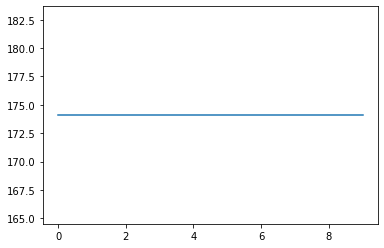

In [48]:
bedroom_tuning = range(0, 10)
bedroom_outputs = []
bedroom_sample = np.array(random_sample)

for i in bedroom_tuning:
    bedroom_sample[0][0] = i
    print(bedroom_sample)
    pred = model.predict(random_sample)
    bedroom_outputs.append(pred)

plt.plot(bedroom_tuning, bedroom_outputs)

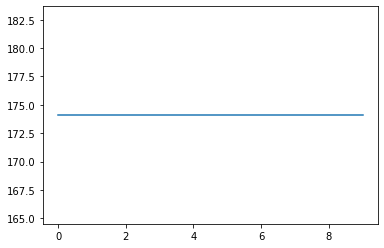

In [49]:
bathroom_tuning = range(0, 10)
bathroom_outputs = []
bathroom_sample = np.array(random_sample)
for i in bathroom_tuning:
    bathroom_sample[0][1] = i
    pred = model.predict(random_sample)
    bathroom_outputs.append(pred)

plt.plot(bathroom_tuning, bathroom_outputs)